# **Вихревые оптические пучки**
## **НИР Ахметов Линар 6133 2 семестр магистратуры**
### Тема НИР: Распознавание мультиплексированных вихревых пучков с использованием нейронных сетей



### **Описание ноутбука и полученные выводы**

Полученные в ноутбуке `forming_vortex_beam_master_research_2022_forming_dataset_phase` изображения смоделированных пучков парсятся из папки и скармиваются в нейронку.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import math

import cv2

import os, sys

In [2]:
# dir_name = 'modeled_beam_images_505'
# image_resolution = (120, 120)
    

# imgs2 = []
# labels_beam2 = []

# pictures = os.listdir(f'{dir_name}')
# for k in range(len(pictures)//10):
#     im_tmp = cv2.imread(f'{dir_name}/{pictures[k]}', 0)  # Достаем именно монохромные картинки
#     im = cv2.resize(im_tmp, image_resolution)
#     (delta, a, b) = pictures[k].split('.')[0].split(' ')
#     delta = int(delta)
#     a = int(a)
#     b = int(b)
#     imgs2.append(im)
#     labels_beam2.append((a, b))

        
# imgs2 = np.array(imgs2)
# imgs2 = imgs2.reshape((*imgs2.shape, 1))

In [3]:
# plt.figure(figsize=(14,10))
# for i in range(30):
#     plt.subplot(5,6,i+1) # индексы тут и в figure наоборот, как ни странно
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(imgs2[10*i], cmap=plt.cm.hot)
#     plt.xlabel(labels_beam2[10*i])


In [4]:
dir_name = 'modeled_beam_images_505'
image_resolution = (120, 120)
    

imgs = []
labels_beam = []

pictures = os.listdir(f'{dir_name}')
for k in range(len(pictures)):
    im_tmp = cv2.imread(f'{dir_name}/{pictures[k]}', 0)  # Достаем именно монохромные картинки
    im = cv2.resize(im_tmp, image_resolution)
    (delta, a, b) = pictures[k].split('.')[0].split(' ')
    delta = int(delta)
    a = int(a)
    b = int(b)
    imgs.append(im)
    labels_beam.append((a, b))

        
imgs = np.array(imgs)
imgs = imgs.reshape((*imgs.shape, 1)) # для корректной работы с Conv2 дальше надо в отдельную размерность вынести цвет

Нарисуем полученные картинки

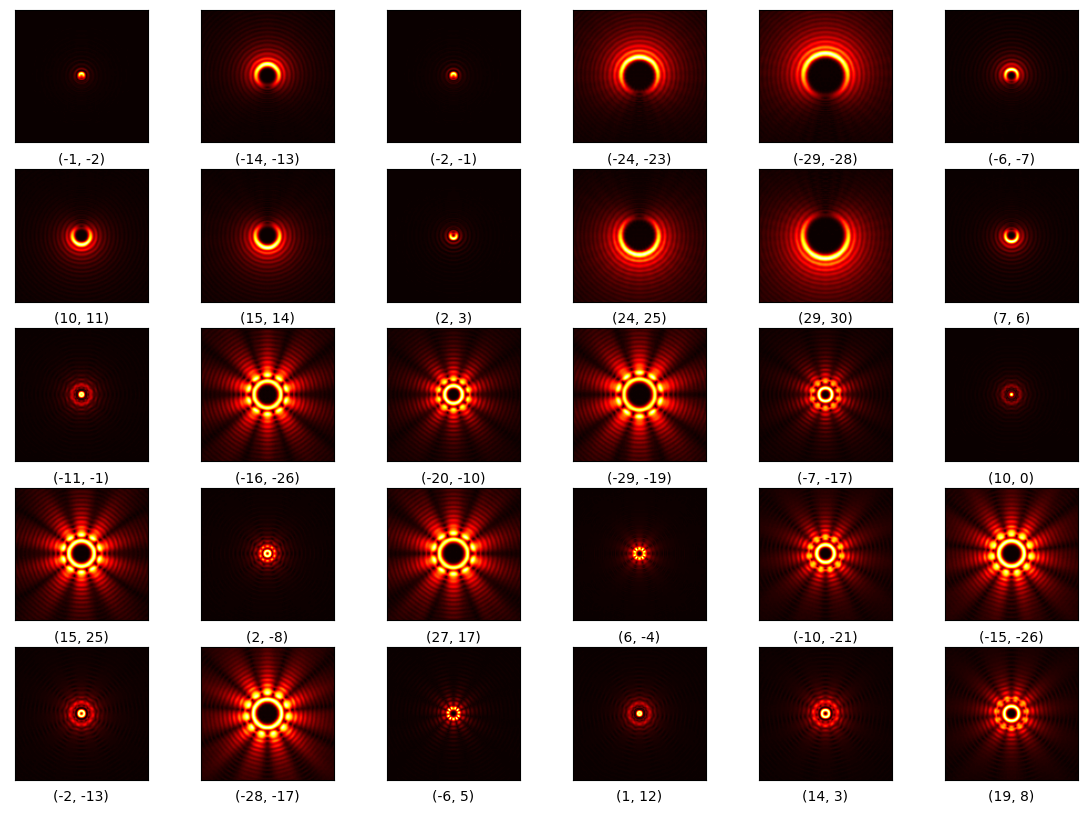

In [5]:
plt.figure(figsize=(14,10))
for i in range(30):
    plt.subplot(5,6,i+1) # индексы тут и в figure наоборот, как ни странно
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imgs[10*i], cmap=plt.cm.hot)
    plt.xlabel(labels_beam[10*i])


Посчитаем число классов в набор данных

In [6]:
labels_list = [abs(one_label[0]-one_label[1]) for one_label in labels_beam]
labels = np.array(labels_list)

In [7]:
for i in set(labels_list):
    print(i,"\t", labels_list.count(i))


1 	 116
2 	 115
3 	 116
4 	 114
5 	 112
6 	 110
7 	 108
8 	 106
9 	 104
10 	 102
11 	 100
12 	 98
13 	 96
14 	 94
15 	 92
16 	 90
17 	 88
18 	 86
19 	 84
20 	 82
21 	 80
22 	 78
23 	 76
24 	 74
25 	 72
26 	 70
27 	 68
28 	 66
29 	 64
30 	 62


In [8]:
imgs.shape

(2723, 120, 120, 1)

In [9]:
np.array(labels_beam).shape

(2723, 2)

In [10]:
# Вычислим дельту орбитального углового момента пучков в суперпозиции для результирующего датасета
labels_delta = []
for l in labels_beam:
    labels_delta.append(abs(l[0]-l[1]))
labels_delta = np.array(labels_delta)
labels_delta.shape

(2723,)

Получили 2723 монохромных изображения из 30 классов с разрешением 120 на 120 пикселей

Они записаны в трех переменных: 

`imgs` - сами изображения

`labels_beam` - два числа - значения углового орбитально момента

`labels_delta` - одно число - значение модуля разности угловых моментов

#### Todo: сделать аугментацию

### Предобрабатываем данные

Нормализовываем каждое изображение (чтобы значение пикселя было в диапазоне [0, 1]):

In [11]:
# Перезапишем в обоащенно названные переменные
images_new_raw = imgs
labels_new = labels
images_new_raw.shape

(2723, 120, 120, 1)

In [12]:
np.max(images_new_raw[0])

242

In [13]:
images_new = np.zeros(shape = images_new_raw.shape)
for index, one_image in enumerate(images_new_raw):
    images_new[index] = one_image / np.max(one_image)

### Готовим данные на train и test:

In [14]:
from sklearn.model_selection import train_test_split

data_train, data_test, labels_train_raw, labels_test_raw = train_test_split(images_new, labels_new, test_size=0.20, random_state=42)

In [15]:
labels_train_raw

array([27,  7,  8, ...,  2, 21, 17])

In [16]:
# отбросим лишние данные из массивов labels и делаем их целочисленными в диапазоне [0,9]
labels_train = labels_train_raw - 1
labels_test = labels_test_raw - 1

del(labels_train_raw) # очищаем переменную
del(labels_test_raw) # очищаем переменную

labels_train

array([26,  6,  7, ...,  1, 20, 16])

In [17]:
class_names = list(range(1,31,1)) # маппинг ответов нейронки на реальное значение модуля разницы между угловыми орбитальными моментами двух пучков в их суперпозиции. Т.е. если нейронка выдаёт 0, то действительная разницы угловых орб моментов равна 1
print(class_names)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


Посмотрим на первые 30 изображений после разбиения на train и test и после шафлинга:

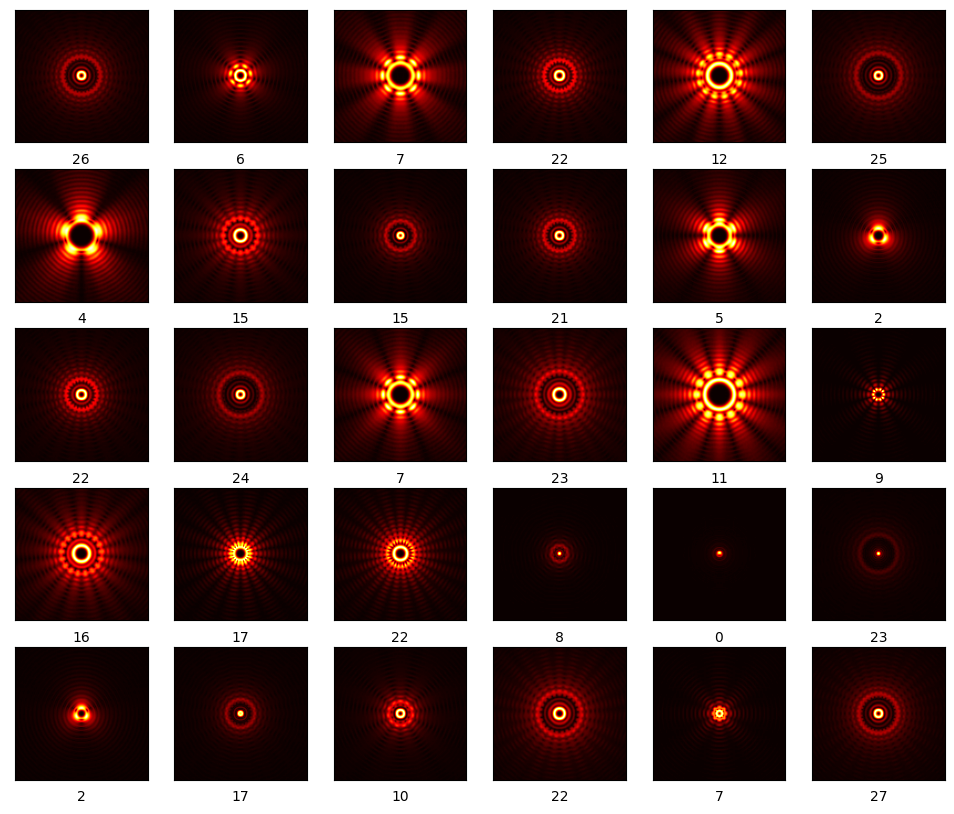

In [18]:
plt.figure(figsize=(12,10))
for i in range(30):
    plt.subplot(5,6,i+1) # индексы тут и в figure наоборот, как ни странно
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data_train[i], cmap=plt.cm.hot)
    plt.xlabel(labels_train[i])

### Далее при обучении модели воспроизводим статью https://habr.com/ru/post/426797/¶

In [19]:
#Подключаем библиотеки
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

### **Строим модель**

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(120, 120, 1)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(30, activation=tf.nn.softmax)
])

### **Компилируем модель**

In [21]:
model.compile(optimizer=tf.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
history = model.fit(data_train, labels_train, validation_split=0.33, epochs=35)

Epoch 1/35
46/46 [==============================] - 3s 44ms/step - loss: 3.2773 - accuracy: 0.1090 - val_loss: 2.9473 - val_accuracy: 0.2170
Epoch 2/35
46/46 [==============================] - 1s 25ms/step - loss: 2.8727 - accuracy: 0.2406 - val_loss: 2.7022 - val_accuracy: 0.2462
Epoch 3/35
46/46 [==============================] - 1s 22ms/step - loss: 2.6198 - accuracy: 0.2879 - val_loss: 2.5200 - val_accuracy: 0.3074
Epoch 4/35
46/46 [==============================] - 1s 22ms/step - loss: 2.4202 - accuracy: 0.3358 - val_loss: 2.3982 - val_accuracy: 0.3561
Epoch 5/35
46/46 [==============================] - 1s 26ms/step - loss: 2.2678 - accuracy: 0.3708 - val_loss: 2.2500 - val_accuracy: 0.3602
Epoch 6/35
46/46 [==============================] - 1s 24ms/step - loss: 2.1350 - accuracy: 0.4167 - val_loss: 2.1392 - val_accuracy: 0.3894
Epoch 7/35
46/46 [==============================] - 1s 26ms/step - loss: 2.0035 - accuracy: 0.4393 - val_loss: 2.0015 - val_accuracy: 0.4298
Epoch 8/35
46

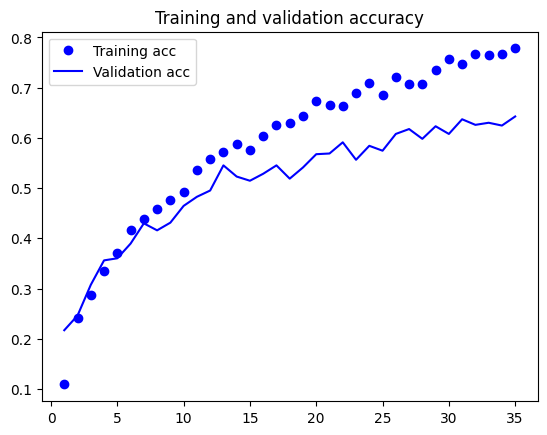

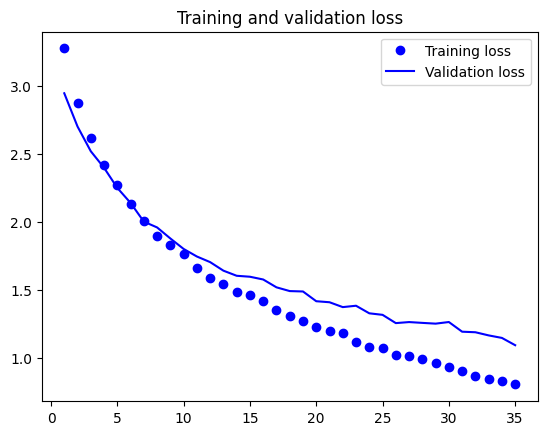

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [24]:
test_loss, test_acc = model.evaluate(data_test, labels_test)
print('Test accuracy:', test_acc)

18/18 [==============================] - 0s 9ms/step - loss: 1.1468 - accuracy: 0.6495
Test accuracy: 0.6495412588119507


### CNN

In [25]:
data_train.shape

(2178, 120, 120, 1)

In [26]:
# data_train1 = data_train.copy()
# data_train1 = data_train_1.reshape((2178, 120, 120, 1))
# data_train1.shape

#Подключаем библиотеки
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [27]:
data_train.shape[1:]

(120, 120, 1)

In [32]:
model_pool = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), padding='same', input_shape=data_train.shape[1:], activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(input_shape=(120, 120, 1)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(30, activation=tf.nn.softmax)
])

In [33]:
model_pool.compile(optimizer=tf.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
history = model_pool.fit(data_train, labels_train, validation_split=0.33, epochs=25)

Epoch 1/25
46/46 [==============================] - 24s 518ms/step - loss: 2.7549 - accuracy: 0.2584 - val_loss: 2.4461 - val_accuracy: 0.3310
Epoch 2/25
46/46 [==============================] - 23s 510ms/step - loss: 2.2321 - accuracy: 0.3619 - val_loss: 2.1187 - val_accuracy: 0.4033
Epoch 3/25
46/46 [==============================] - 21s 453ms/step - loss: 1.8357 - accuracy: 0.4647 - val_loss: 1.8049 - val_accuracy: 0.4715
Epoch 4/25
46/46 [==============================] - 27s 585ms/step - loss: 1.6070 - accuracy: 0.5223 - val_loss: 1.6081 - val_accuracy: 0.5188
Epoch 5/25
46/46 [==============================] - 29s 638ms/step - loss: 1.3940 - accuracy: 0.5860 - val_loss: 1.4384 - val_accuracy: 0.5661
Epoch 6/25
46/46 [==============================] - 26s 560ms/step - loss: 1.2578 - accuracy: 0.6100 - val_loss: 1.3987 - val_accuracy: 0.5800
Epoch 7/25
46/46 [==============================] - 31s 668ms/step - loss: 1.1397 - accuracy: 0.6614 - val_loss: 1.2710 - val_accuracy: 0.6106

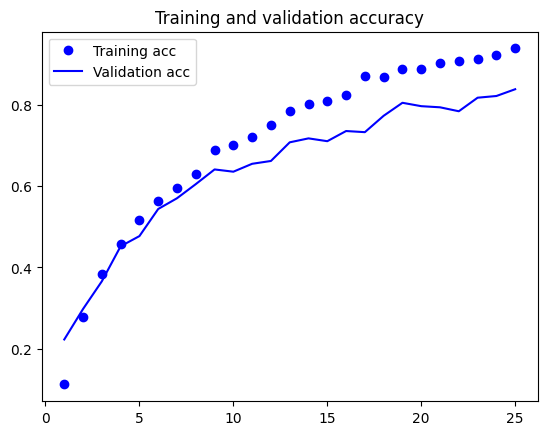

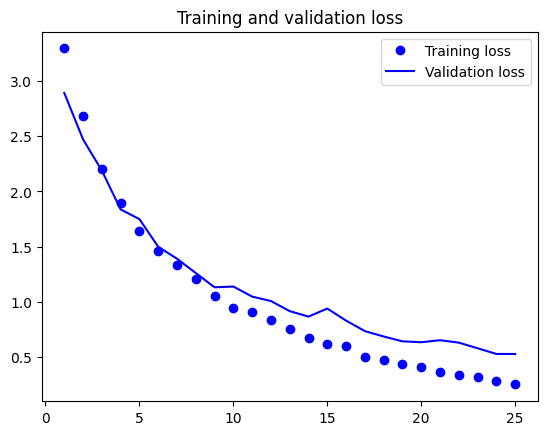

In [68]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [70]:
test_loss, test_acc = model_pool.evaluate(data_test, labels_test)
print('Test accuracy:', test_acc)

18/18 [==============================] - 1s 77ms/step - loss: 0.5413 - accuracy: 0.8440
Test accuracy: 0.8440366983413696
